In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

# Paintings

## Get data

### Download data

Make sure to have opened Jupyter notebook from the project folder.

In [2]:
!pwd

/home/sevebot/code/seve-26/vincentvanbot/notebooks/data-retrieval


In [4]:
# download data in zip file
!curl https://www.wga.hu/database/download/data_txt.zip > data_txt.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1630k  100 1630k    0     0  1946k      0 --:--:-- --:--:-- --:--:-- 1943k


In [5]:
# unzip downloaded data ands save it in a data folder 
#(on Mac you might have to change the direction of the slashes to \..\..\raw_data)
!unzip data_txt.zip -d ../../raw_data

Archive:  data_txt.zip
  inflating: ../../raw_data/catalog.csv  


If you don't have unzip installed (i.e. you receive an error like "unzip command not found" from the last cell), you can install it with `sudo apt install -y unzip`

In [6]:
# clean your directory
!rm data_txt.zip

### Import data in your notebook

In [8]:
path = os.path.join('..','..','raw_data','catalog.csv')
df = pd.read_csv(path, encoding= 'unicode_escape') # take care of non-ASCII characters such as 'ö'

df.head()

,AUTHOR,BORN-DIED,TITLE,DATE,TECHNIQUE,LOCATION,URL,FORM,TYPE,SCHOOL,TIMEFRAME
0,"AACHEN, Hans von","(b. 1552, Köln, d. 1615, Praha)",Venus and Adonis,1574-88,"Oil on canvas, 68 x 95 cm","Fogg Art Museum, Harvard University, Cambridge",https://www.wga.hu/html/a/aachen/adonis.html,painting,mythological,German,1601-1650
1,"AACHEN, Hans von","(b. 1552, Köln, d. 1615, Praha)",Allegory,1598,"Oil on copper, 56 x 47 cm","Alte Pinakothek, Munich",https://www.wga.hu/html/a/aachen/allegory.html,painting,mythological,German,1601-1650
2,"AACHEN, Hans von","(b. 1552, Köln, d. 1615, Praha)","Allegory of Peace, Art and Abundance",1602,"Oil on canvas, 197 x 142 cm","The Hermitage, St. Petersburg",https://www.wga.hu/html/a/aachen/allegorz.html,painting,mythological,German,1601-1650
3,"AACHEN, Hans von","(b. 1552, Köln, d. 1615, Praha)","Jupiter, Antiope and Cupid",1595-98,"Oil on copper, 31 x 21 cm","Kunsthistorisches Museum, Vienna",https://www.wga.hu/html/a/aachen/antiope.html,painting,mythological,German,1601-1650
4,"AACHEN, Hans von","(b. 1552, Köln, d. 1615, Praha)","Pallas Athena, Venus and Juno",1593,"Oil on canvas, 54 x 67 cm","Museum of Fine Arts, Boston",https://www.wga.hu/html/a/aachen/athena.html,painting,mythological,German,1601-1650


In [9]:
len(df)

50575

In [10]:
df.dtypes # if we want to use the dates, we need to do some preprocessing

AUTHOR       object
BORN-DIED    object
TITLE        object
DATE         object
TECHNIQUE    object
LOCATION     object
URL          object
FORM         object
TYPE         object
SCHOOL       object
TIMEFRAME    object
dtype: object

In [11]:
df.isnull().sum() # we might have to check for other types of null values (maybe '', or '-')

AUTHOR       0
BORN-DIED    0
TITLE        0
DATE         0
TECHNIQUE    0
LOCATION     0
URL          0
FORM         0
TYPE         0
SCHOOL       0
TIMEFRAME    0
dtype: int64

### Initial preprocessing

We need to transform the URL (currently an html page) into the usual representation of an image (i.e. np.array of shape (width,height,channels)

#### Get link from html to jpg

The URL of the image is in html form. We need to adjust this URL to get the direct link to the image. This adjustment is based on how the website was built.

In [12]:
def get_jpg_link(html_link: str) -> str:
    """Tranform the html_link of the image to its respective jpg_link"""
    
    jpg_link = html_link.replace('html','art', 1).replace('html','jpg')
    
    return jpg_link

In [13]:
html_link_test = 'https://www.wga.hu/html/a/aachen/adonis.html'
get_jpg_link(html_link_test) # should return 'https://www.wga.hu/art/a/aachen/adonis.jpg'

'https://www.wga.hu/art/a/aachen/adonis.jpg'

#### Transform jpg to NumPy array

In [14]:
def jpg_to_array(jpg_link: str) -> np.ndarray:
    """Given an image jpg_link, it returns its vectorial representation"""
    
    img_vector = plt.imread(jpg_link, format='jpg')
    
    return img_vector

<class 'numpy.ndarray'> (1400, 1032, 3)


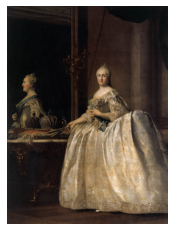

In [15]:
random_img_html = df.iloc[np.random.randint(0,len(df))]['URL']
random_img_jpg = get_jpg_link(random_img_html)
random_img_arr = jpg_to_array(random_img_jpg)

print(type(random_img_arr), random_img_arr.shape)

plt.imshow(random_img_arr)
plt.axis('off');

Run the above cell a few times. Notice how we have different sizes for different images! This is something we should probably take care of (maybe padding? Or size reduction?)

## Product ideas

### Paintings that look like pictures

The user takes a picture of something that he likes (e.g. a sunrise on the sea). The algorithm returns the painting that is most similar to the picture (e.g. _Impression, Sunrise_ by Claude Monet)

<table>
    <tr>
        <td style="text-align:center;font-size:15px"><strong>Uploaded by the user</strong></td>
        <td></td>
        <td style="text-align:center;font-size:15px"><strong>Returned by algorithm</strong></td>
    </tr>
    <tr>
        <td> <img src="https://pixnio.com/free-images/2017/10/17/2017-10-17-05-52-13.jpg" width="300"/> </td>
        <td>
            <img src="https://www.clipartkey.com/mpngs/m/38-380671_arrows-black-right-arrow-white-background.png" width="50"/>
        </td>
        <td> <img src="https://www.wga.hu/art/m/monet/03/0impress.jpg" width="300"/> </td>
    </tr>
</table>

In [ ]:
df[df['TITLE'] == 'Impression, Sunrise']

### Paintings recommender system

The user types the title of his favourite painting (e.g. `Impression, Sunrise`). The algorithm returns a list of other painting that are similar to the input and that the user might like.

<table>
    <tr>
        <td style="text-align:center;font-size:15px"><strong>Uploaded by the user</strong></td>
        <td></td>
        <td style="text-align:center;font-size:15px"><strong>Returned by algorithm</strong></td>
    </tr>
    <tr>
        <td style="text-align:center;font-size:26px">"Impression, Sunrise"</td>
        <td>
            <img src="https://www.clipartkey.com/mpngs/m/38-380671_arrows-black-right-arrow-white-background.png" width="50"/>
        </td>
        <td>
            <table>
                <tr>
                    <td>
                        <img src="https://images.fineartamerica.com/images/artworkimages/mediumlarge/1/ocean-sunrise-sandy-hemmer.jpg" width="150"/>
                    </td>
                    <td>
                        <img src="https://images.fineartamerica.com/images/artworkimages/mediumlarge/1/abstract-ocean-bay-sunrise-kathy-symonds.jpg" width="150"/>
                    </td>
                    <td>
                        <img src="https://i.pinimg.com/736x/d8/27/c0/d827c0d8164c3ffea31cdb36dad5eeb1.jpg" width="150"/>
                    </td>
                </tr>
            </table>
        </td>
    </tr>
</table>

### Any other idea?